In [ ]:
import os
import pandas as pd
from rdkit import Chem

import stylia as st
from stylia import (
    ONE_COLUMN_WIDTH,
    TWO_COLUMNS_WIDTH,
    NamedColorMaps,
    NamedColors,
    ContinuousColorMap,
)

data_dir = "../data/"
model_dir = "../models/"
figure_dir = "../figures/"


def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "processed","all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir,"ersilia-models", "all_smiles_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)


df = pd.read_csv(os.path.join(data_dir,"processed", "all_molecules.csv"))
colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")



# Negative Data: InertDB

InertDB is  completely inert subset of ChEMBL

In [ ]:
#Do not run again
inertdb = os.path.join(data_dir, "inertdb", "inertdb_cic_v2024.03.smi")
inertdb_smi= []
with open(inertdb, 'r') as file:
    for line in file:
        inertdb_smi.append(line.strip())
print(len(inertdb_smi))
inertdb = pd.DataFrame(inertdb_smi, columns=["SMILES"])
inertdb.to_csv(os.path.join(data_dir, "inertdb", "inertdb.csv"), index=False)

3205


/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finit

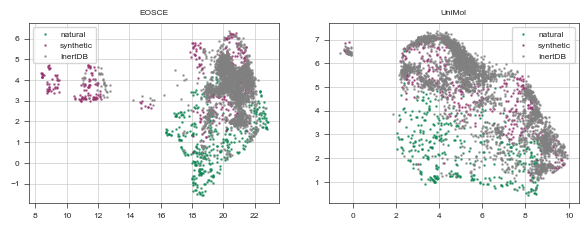

In [13]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
inertdb = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb_eos2gw4.csv"))
inertdb = inertdb.dropna()
inertdb_descs=inertdb.iloc[:,2:]
inertdb_array = inertdb_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
inertdb_umap = umap_trn.transform(inertdb_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(inertdb_umap)[0],
    np.transpose(inertdb_umap)[1],
    alpha=0.7,
    label="InertDB",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
inertdb = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb_eos39co.csv"))
inertdb = inertdb.dropna()
inertdb_descs=inertdb.iloc[:,2:]
inertdb_array = inertdb_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
inertdb_umap = umap_trn.transform(inertdb_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(inertdb_umap)[0],
    np.transpose(inertdb_umap)[1],
    alpha=0.7,
    label="InertDB",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Negative Data: ChEMBL

Randomly sample a subset of 3000 molecules from ChEMBL35

In [ ]:
#Do not run again
df = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_35_chemreps.txt"), delimiter='\t') 
sampled_df = df[['canonical_smiles']].sample(n=3000, random_state=24)
print(sampled_df.shape)
all_smi = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
sampled_df = sampled_df[~sampled_df['canonical_smiles'].isin(all_smi['canonical_smiles'])]
print(sampled_df.shape)
sampled_df.to_csv(os.path.join(data_dir,"chembl",'chembl_smi.csv'), index=False)

(3000, 1)
(3000, 1)


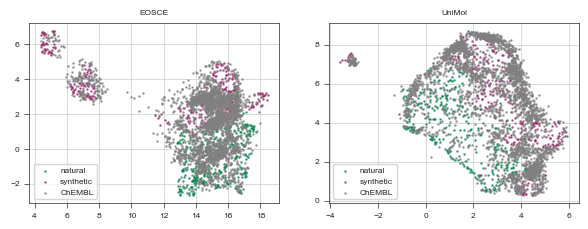

In [26]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi_eos2gw4.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi_eos39co.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Negative Data: COCONUT
Natural product database randomly sampled to obtain 3000 molecules

In [32]:
# do not run again
df = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_csv_lite-04-2025.csv"))
sampled_df = df[['canonical_smiles']].sample(n=3000, random_state=24)
print(sampled_df.shape)
all_smi = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
sampled_df = sampled_df[~sampled_df['canonical_smiles'].isin(all_smi['canonical_smiles'])]
print(sampled_df.shape)
sampled_df.to_csv(os.path.join(data_dir,"coconut",'coconut_smi.csv'), index=False)

/tmp/ipykernel_11847/310692272.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_csv_lite-04-2025.csv"))


(3000, 1)
(3000, 1)


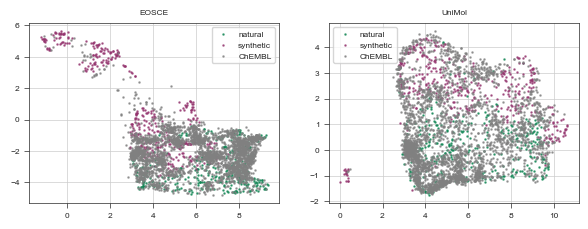

In [4]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi_eos2gw4.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi_eos39co.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Train Models

In [5]:
import collections
import lazyqsar as lq
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import json
import numpy as np
import random

TIME_BUDGET_SEC = 60
ESTIMATOR_LIST = ["rf", "lgbm"]
REDUCED = False
N_FOLDS = 5
model_dir = "../models"


def cross_validate(smiles_list, y, name):

    cross_validation_data = collections.defaultdict(list)

    for _ in tqdm(range(N_FOLDS)):
        smiles_train, smiles_test, y_train, y_test = train_test_split(
            smiles_list,y, test_size=0.2, stratify=y
        )

        model = lq.MorganBinaryClassifier(
            reduced=REDUCED, time_budget_sec=TIME_BUDGET_SEC, estimator_list=ESTIMATOR_LIST
        )
        model.fit(smiles_train, y_train)

        y_pred = model.predict_proba(smiles_test)[:, 1]

        fpr, tpr, thr = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        J = tpr - fpr

        best_thr_index = np.argmax(J)
        best_thr = thr[best_thr_index]

        cross_validation_data["roc_auc"] += [roc_auc]
        cross_validation_data["thr"] += [best_thr]
        cross_validation_data["y_hat"] += [list(y_pred)]
        cross_validation_data["y"] += [list(y_test)]

    with open(
        os.path.join(model_dir, f"{name}.json"),
        "w",
    ) as f:
        json.dump(cross_validation_data, f, indent=4)

## NP product model

In [6]:
%%capture
pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
pos = pos[pos["category"] == "natural"]
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi.csv"))
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]

all = pd.concat([pos, neg], axis=0)
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "np_only")

## Synthetic model: Chembl

In [7]:
pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
pos = pos[pos["category"] == "synthetic"]
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi.csv"))
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]
all = pd.concat([pos, neg], axis=0)
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "sd_chembl")

100%|██████████| 5/5 [05:15<00:00, 63.05s/it]


In [8]:

pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
pos = pos[pos["category"] == "synthetic"]
neg = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb.csv"))
neg = neg.rename(columns={"SMILES": "canonical_smiles"})
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]

all = pd.concat([pos, neg], axis=0)
print(all.shape)
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "sd_inertdb")

(3624, 2)


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [05:06<00:00, 61.30s/it]


## All with mixed negs

In [9]:

pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
neg_sd = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi.csv"))
neg_sd = neg_sd.sample(frac=0.5, random_state=42)
neg_np = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi.csv"))
neg_np = neg_np.sample(frac=0.5, random_state=42)
neg = pd.concat([neg_sd, neg_np], axis=0)
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]

all = pd.concat([pos, neg], axis=0)
print(all.shape)
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "sd_and_np")

(3813, 2)


100%|██████████| 5/5 [05:24<00:00, 64.98s/it]


# Model Performances

In [10]:
def plot_roc_curve(ax, name):
    with open(os.path.join(model_dir, f"{name}.json"), 'r') as f:
        results = json.load(f)

    y_hats = results['y_hat']
    y_trues = results['y']

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for y_true, y_hat in zip(y_trues, y_hats):
        y_true = np.array(y_true)
        y_hat = np.array(y_hat)

        fpr, tpr, _ = roc_curve(y_true, y_hat)
        roc_auc = auc(fpr, tpr)

        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)

    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = {:.2f} $\pm$ {:.2f})'.format(mean_auc, std_auc),
            lw=1, alpha=1)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray')
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tpr_lower, tpr_upper, color='gray', alpha=0.5,
                    label=r'$\pm$ 1 std. dev.')
    ax.set_title(f"AUROC {name}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    

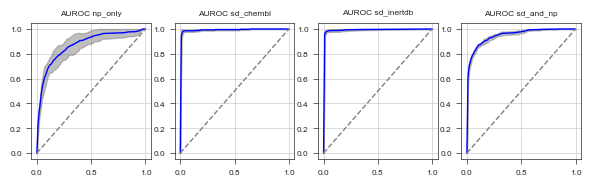

In [ ]:
names = ["np_only", "sd_chembl", "sd_inertdb", "sd_and_np"]
fig, axs = st.create_figure(
    1, len(names), width=TWO_COLUMNS_WIDTH, height=0.25 * TWO_COLUMNS_WIDTH
)

for n in names:
    ax = axs.next()
    plot_roc_curve(ax, n)

plt.tight_layout()
plt.savefig(os.path.join(figure_path, "roc_curves.png"), dpi=300)